<a href="https://colab.research.google.com/github/HW0327/Electromagnetism-Project/blob/main/parallel_plane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import math
import numpy as np
import pandas as pd
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import warnings
#suppress warnings
warnings.filterwarnings('ignore')
# Set up the constants
mu_0 = 4 * math.pi * 1e-7  # Permeability of free space

# Set up the parameters for the data
I_values = np.arange(1,11)  # Values of I to use


In [2]:
x=np.linspace(-50,50,11)  # x-position of the testing point
y=np.linspace(-50,50,11)  # y-position of the testing point
H=np.linspace(10,100,10)  # Height of the wire

print(x)


[-50. -40. -30. -20. -10.   0.  10.  20.  30.  40.  50.]


In [3]:

# Create the header row for the CSV file
header_row = ['I', 'H', 'X', 'Y', 'B']

# Create a list to store the rows of data
data_rows = []

# Loop over the I and R values and calculate the corresponding B values
for I in I_values:
  for n in H:
    for m in x:
      for j in y:
        R=np.sqrt(n**2+j**2)
        B = mu_0 * I / (2 * math.pi * R)
        data_rows.append([I, n, m, j, B])

# Write the data to a CSV file
with open('biot_savart_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(header_row)
    writer.writerows(data_rows)

data=pd.read_csv('biot_savart_data.csv', sep=',')
#data=preprocessing.normalize(data)
data=(data-data.mean())/data.std()
data

,I,H,X,Y,B
0,-1.566634,-1.566634,-1.581073,-1.581073,-0.875152
1,-1.566634,-1.566634,-1.581073,-1.264859,-0.829600
2,-1.566634,-1.566634,-1.581073,-0.948644,-0.757284
3,-1.566634,-1.566634,-1.581073,-0.632429,-0.628746
4,-1.566634,-1.566634,-1.581073,-0.316215,-0.373708
...,...,...,...,...,...
12095,1.566634,1.566634,1.581073,0.316215,-0.091157
12096,1.566634,1.566634,1.581073,0.632429,-0.105344
12097,1.566634,1.566634,1.581073,0.948644,-0.127673
12098,1.566634,1.566634,1.581073,1.264859,-0.156474


In [4]:
I_noise = np.random.normal(np.mean(np.array(data['I'])),1,40)
X_noise = np.random.normal(np.mean(np.array(data['X'])),1,40)
H_noise = np.random.normal(np.mean(np.array(data['H'])),1,40)
Y_noise = np.random.normal(np.mean(np.array(data['Y'])),1,40)
B_noise = np.random.normal(np.mean(np.array(data['B'])),1,40)
noise=pd.DataFrame({'I': I_noise, 'H': H_noise, 'X': X_noise, 'Y': Y_noise, 'B': B_noise})
data=data.append(noise, ignore_index=True)
data=np.array(data)
print(len(data))

12140


In [5]:

# Split the data into training and testing sets
num_training_samples = 10800
#training_data = data[:num_training_samples]
#testing_data = data[num_training_samples:]
X=[[row[0], row[1], row[2], row[3]] for row in data]
y=[row[4] for row in data]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)
# Create the regression models
linear_regression = LinearRegression()
decision_tree_regression = DecisionTreeRegressor(max_depth=5)
neural_network_regression = MLPRegressor(hidden_layer_sizes=(10, 10))
decision_tree_regression2 = DecisionTreeRegressor(max_depth=10)
knn = KNeighborsRegressor()
RFC=RandomForestRegressor()
# Fit the regression models iteratively
train_sizes = range(100, num_training_samples, 100)
losses = []
for model in [neural_network_regression, decision_tree_regression, decision_tree_regression2, knn, RFC]:
    model_losses = []
    for train_size in train_sizes:
        X_trainn = np.array(X_train[:train_size])
        y_trainn = np.array(y_train[:train_size])
        model.fit(X_trainn, y_trainn)
        y_pred = model.predict(X_test)
        loss = mean_squared_error(y_test, y_pred)
        model_losses.append(loss)
    losses.append(model_losses)


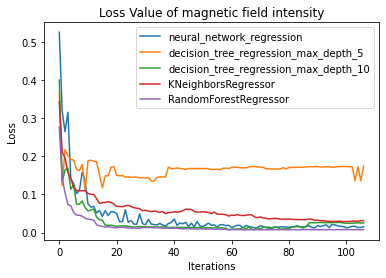

In [6]:
# Plot model losses
modelss=["neural_network_regression", "decision_tree_regression_max_depth_5", "decision_tree_regression_max_depth_10", "KNeighborsRegressor", "RandomForestRegressor"]
for i, expert in enumerate(modelss):
    plt.plot(losses[i], label=f'{expert}')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Value of magnetic field intensity")
plt.legend(loc="upper right")

plt.show()


In [7]:
# Predict on testing data using trained models, and calculate the test  mean square error of each model

for model in [neural_network_regression, decision_tree_regression, decision_tree_regression2, knn, RFC]:
  pred=model.predict(X_test)
  regression_mse = mean_squared_error(y_test, pred)
  print(f"{model} mean square error:", regression_mse)
  acc=0
  for i in range(len(pred)):
    if abs(pred[i]==y_test[i])<=0.1:
      acc+=1
  print(f"{model} accuracy:", acc/len(pred))


MLPRegressor(hidden_layer_sizes=(10, 10)) mean square error: 0.014853516306419373
MLPRegressor(hidden_layer_sizes=(10, 10)) accuracy: 1.0
DecisionTreeRegressor(max_depth=5) mean square error: 0.1740873994552
DecisionTreeRegressor(max_depth=5) accuracy: 1.0
DecisionTreeRegressor(max_depth=10) mean square error: 0.025264207979830405
DecisionTreeRegressor(max_depth=10) accuracy: 0.8253706754530478
KNeighborsRegressor() mean square error: 0.03127322349268526
KNeighborsRegressor() accuracy: 1.0
RandomForestRegressor() mean square error: 0.007789727197323708
RandomForestRegressor() accuracy: 0.9464579901153213


In [8]:
I_losses = []
X=[[row[1], row[2], row[3], row[4]] for row in data]
y=[row[0] for row in data]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
for model in [neural_network_regression, decision_tree_regression, decision_tree_regression2, knn, RFC]:
    model_losses = []
    for train_size in train_sizes:
        X_trainn = np.array(X_train[:train_size])
        y_trainn = np.array(y_train[:train_size])
        model.fit(X_trainn, y_trainn)
        y_pred = model.predict(X_test)
        loss = mean_squared_error(y_test, y_pred)
        model_losses.append(loss)
    I_losses.append(model_losses)

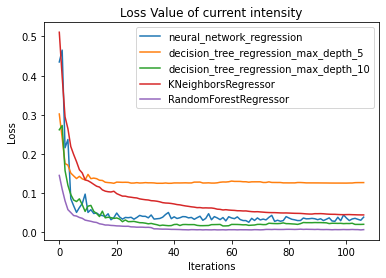

In [9]:
# Plot model losses
modelss=["neural_network_regression", "decision_tree_regression_max_depth_5", "decision_tree_regression_max_depth_10", "KNeighborsRegressor", "RandomForestRegressor"]
for i, expert in enumerate(modelss):
    plt.plot(I_losses[i], label=f'{expert}')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Value of current intensity")
plt.legend(loc="upper right")

plt.show()

In [10]:
# Predict on testing data using trained models, and calculate the test mean square error of each model

for model in [neural_network_regression, decision_tree_regression, decision_tree_regression2, knn, RFC]:
  pred=model.predict(X_test)
  regression_mse = mean_squared_error(y_test, pred)
  print(f"{model} mean square error:", regression_mse)
  acc=0
  for i in range(len(pred)):
    if abs(pred[i]-y_test[i])<=0.1:
      acc+=1
  print(f"{model} accuracy:", acc/len(pred))



MLPRegressor(hidden_layer_sizes=(10, 10)) mean square error: 0.03884874969658574
MLPRegressor(hidden_layer_sizes=(10, 10)) accuracy: 0.8443163097199341
DecisionTreeRegressor(max_depth=5) mean square error: 0.12703942840561636
DecisionTreeRegressor(max_depth=5) accuracy: 0.22652388797364087
DecisionTreeRegressor(max_depth=10) mean square error: 0.02053883498333439
DecisionTreeRegressor(max_depth=10) accuracy: 0.8261943986820428
KNeighborsRegressor() mean square error: 0.04446758016231921
KNeighborsRegressor() accuracy: 0.5181219110378913
RandomForestRegressor() mean square error: 0.0069458766086428194
RandomForestRegressor() accuracy: 0.9967051070840197
